In [2]:
import numpy as np
import matplotlib.pylab as plt
x0 = np.arange(-2, 2, 0.25)
x1 = np.arange(-2, 2, 0.25)

In [3]:
def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=0) # x0^2 + x1^2

In [4]:
X, Y = np.meshgrid(x0, x1)

In [7]:
Y

array([[-2.  , -2.  , -2.  , -2.  , -2.  , -2.  , -2.  , -2.  , -2.  ,
        -2.  , -2.  , -2.  , -2.  , -2.  , -2.  , -2.  ],
       [-1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75,
        -1.75, -1.75, -1.75, -1.75, -1.75, -1.75, -1.75],
       [-1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 ,
        -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 , -1.5 ],
       [-1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25,
        -1.25, -1.25, -1.25, -1.25, -1.25, -1.25, -1.25],
       [-1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ,
        -1.  , -1.  , -1.  , -1.  , -1.  , -1.  , -1.  ],
       [-0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75,
        -0.75, -0.75, -0.75, -0.75, -0.75, -0.75, -0.75],
       [-0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 ,
        -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 , -0.5 ],
       [-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25,
        -0.25, -0.25, -0.2

In [9]:
Xf = X.flatten()
Yf = Y.flatten()

arr = np.array([Xf, Yf])
print(Xf.shape, Yf.shape)
print(arr.shape, arr.ndim)

(256,) (256,)
(2, 256) 2


In [10]:
def numerical_gradient(f, X):
    if X.ndim == 1:
        return numerical_gradient_single_point(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = numerical_gradient_single_point(f, x)
        
        return grad

In [11]:
def gradient_descent(f, init_x, lr, step_num= 100, return_history = False, verbose = False):
    x = init_x
    vx = np.zeros((step_num+1, 2)) # x의 궤적의 변화를 기록하기 위한 list 초기화
    vx[0] = x
    
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        
        x -= lr * grad
        if verbose:
            print(x, grad)
            
        vx[i+1] = x # keep x in the history list
    
    if return_history:
        
        return x, vx
    else:
        return x

In [12]:
def numerical_gradient_single_point(f, x, verbose=False): 
    h = 1e-4
    grad = np.zeros_like(x)
    if verbose:
        print('x.size={}'.format(x.size)) # (x0, x1) 을 입력으로 받음 --> 2
       
    for idx in range(x.size): #축별로 계산
        v_keep = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(v_keep) + h #n차원 입력 중 해당 차원으로만 h를 더하고
        fxh1 = f(x)
        if verbose:
            print(x, '-->', fxh1)
        
        # f(x-h) 계산
        x[idx] = float(v_keep) - h #n차원 입력 중 해당 차원으로만 h를 빼서
        fxh2 = f(x)
        if verbose:
            print(x, '-->', fxh2)
        
        grad[idx] = (fxh1 - fxh2) / (2*h) #n차원 방향의 차분을 구함 !
        x[idx] = v_keep # 값 복원
        
        if verbose:
            print('grad[{}]={}'.format(idx, grad[idx]))
            print()
    return grad

In [13]:
init_x = np.array([-3.0, 4.0])
print(init_x)

[-3.  4.]


In [14]:
learning_rate = 0.1

<h2>Todo 1</h2>


In [36]:

x_final, x_hist = gradient_descent(function_2, init_x.copy(), lr = 0.001, return_history = True, verbose=False)
x_final_1, x_hist_1 = gradient_descent(function_2, init_x.copy(), lr = 0.01, return_history = True, verbose=False)
x_final_11, x_hist_11 = gradient_descent(function_2, init_x.copy(), lr = 0.1, return_history = True, verbose=False)
x_final_111, x_hist_111 = gradient_descent(function_2, init_x.copy(), lr = 1.0, return_history = True, verbose=False)

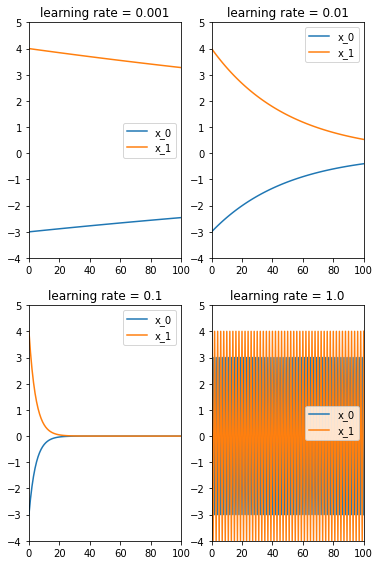

In [56]:


plt.subplot(221)
plt.subplots_adjust(bottom = 0.2)
plt.plot(x_hist[:, 0])
plt.plot(x_hist[:, 1])
plt.legend(['x_0', 'x_1'])
plt.xlim(0, 100)
plt.ylim(-4, 5)
plt.title('learning rate = {}'.format(0.001))

plt.subplot(222)
plt.subplots_adjust(bottom = 0.2)
plt.plot(x_hist_1[:, 0])
plt.plot(x_hist_1[:, 1])
plt.legend(['x_0', 'x_1'])
plt.xlim(0, 100)
plt.ylim(-4, 5)

plt.title('learning rate = {}'.format(0.01))

plt.subplot(223)
plt.subplots_adjust(top = 2.0)
plt.plot(x_hist_11[:, 0])
plt.plot(x_hist_11[:, 1])
plt.legend(['x_0', 'x_1'])
plt.xlim(0, 100)
plt.ylim(-4, 5)
plt.title('learning rate = {}'.format(0.1))


plt.subplot(224)
plt.subplots_adjust(top = 2.0)
plt.plot(x_hist_111[:, 0])
plt.plot(x_hist_111[:, 1])
plt.legend(['x_0', 'x_1'])
plt.xlim(0, 100)
plt.ylim(-4, 5)
plt.title('learning rate = {}'.format(1.0))
plt.show()

**learning rate변화에 따른 학습률 고찰**  

* 1번 그래프처럼 학습률이 너무 적은 경우(lr = 0.001) 학습이 제대로 이루어지지 않는(언더피팅) 현상이 목격됨을 볼 수 있다. 물론 많은 수의 에폭을 가지면 해당 부분을 해결할 수 있지만 컴퓨팅 파워를 굳이 많이 소모하는 일은 피하는게 좋다.  
* 2번의 경우 비교적 적절하다고 볼 수 있다(lr = 0.01) 반복에 따른 파라미터 갱신이 적절하게 이루어지고 있으며 일정 수준의 학습이 조금 더 반복된다면 손실함수 값이 0에 수렴할 것으로 예측되기 떄문이다.  
* 3번의 경우(lr = 0.1) 학습이 비교적 일찍 종료되었다. 반복 수 100번에 비해 20번 전후로 학습이 조기 종료되어 이후로는 사실 의미가 없는 학습이 반복될 뿐이다. 이 경우에는 학습이 조기 종료된 원인(안장점, 오버피팅)을 고려할 필요성이 있다. 만약 모델이 만족스러운 성능을 보여준다고 해도 굳이 손실함수의 갱신이 없는 모델을 계속 학습할 필요는 없을 것이다. 만약 세밀한 학습이 더 필요한 경우 하이퍼파라미터의 유동적인 변화를 통해 해결해야 할 것으로 보인다.
* 4번의 경우(lr = 1.0) 학습률이 지나치게 높아 학습이 이루어지지 않고 있는 것을 알 수 있다. 학습률이 너무 큰 경우 손실함수가 해당 모델의 극솟값을 찾지 못해 오히려 발산하는 경우이다. 이 경우 학습률을 조절해야 학습이 적절하게 진행될 수 있다. 

<h2>Todo2</h2>

In [16]:
z = function_2(arr)

In [17]:
from mpl_toolkits.mplot3d import Axes3D
nrows = X.shape[0]
ncols = X.shape[1]
z = np.reshape(z, (nrows,ncols))

In [18]:
z_hist = x_hist[:, 1]

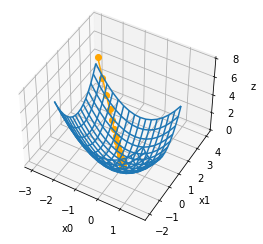

In [19]:
#Todo2
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_wireframe(X, Y, z)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('z')
ax.plot(x_hist[:, 0], x_hist[:, 1], z_hist, 'o-', c = 'orange')
ax.view_init(elev = 45., azim = 300)
